In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv("../data/health_study_dataset.csv")

In [3]:
print("First 5 rows:")
display(df.head())

print("\nMissing values:")
display(df.isna().sum())

print("\nDuplicated rows:")
print(df.duplicated().sum())

print("\nUnique IDs vs total rows:")
print(df["id"].nunique(), len(df))

First 5 rows:


,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease
0,1,57,F,168.9,65.8,141.8,4.58,No,0
1,2,47,M,180.4,95.9,144.8,5.18,Yes,0
2,3,59,F,169.9,82.2,151.7,6.16,No,0
3,4,72,M,157.7,93.1,151.0,6.63,No,0
4,5,46,M,192.6,104.1,144.1,5.21,No,0



Missing values:


id             0
age            0
sex            0
height         0
weight         0
systolic_bp    0
cholesterol    0
smoker         0
disease        0
dtype: int64


Duplicated rows:
0

Unique IDs vs total rows:
800 800


### Table of mean, median, minimum and maximum values for: age, weight, height, blood pressure and cholesterol.

In [4]:
column=["age", "weight", "height", "systolic_bp", "cholesterol"]
statistic_table = pd.DataFrame ({
        "Mean": df[column].mean(),
        "Median": df[column].median(),
        "Max": df[column].max(),
        "Min": df[column].min()
    }).round(2)
display(statistic_table)

,Mean,Median,Max,Min
age,49.43,50.00,90.00,18.0
weight,73.41,73.20,114.40,33.7
height,171.85,171.35,200.40,144.4
systolic_bp,149.18,149.40,185.90,106.8
cholesterol,4.93,4.97,7.88,2.5


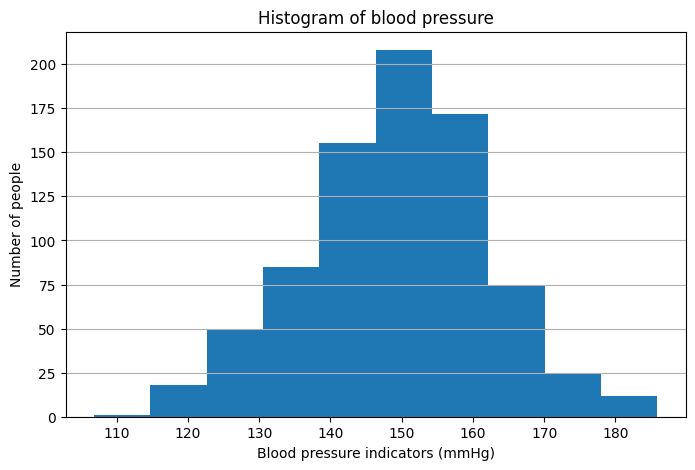

In [5]:

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df['systolic_bp'], bins=10)

ax.set_xlabel("Blood pressure indicators (mmHg)")
ax.set_ylabel("Number of people")
ax.set_title("Histogram of blood pressure")
        
plt.grid(axis = 'y')
plt.show()


## Blood pressure histogram
The blood pressure histogram shows the participants' blood pressure.  
Most people have a blood pressure between 140 mmHg and 160 mmHg, while the average pressure is about 149 mmHg.   
The highest recorded value is 186 mmHg and the lowest is 107 mmHg.

### Table of weight statistics by gender (count, mean, std, min, quartiles, max)

In [6]:
df.groupby('sex')['weight'].describe().round()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,403.0,67.0,12.0,34.0,59.0,67.0,74.0,107.0
M,397.0,80.0,13.0,44.0,71.0,79.0,88.0,114.0


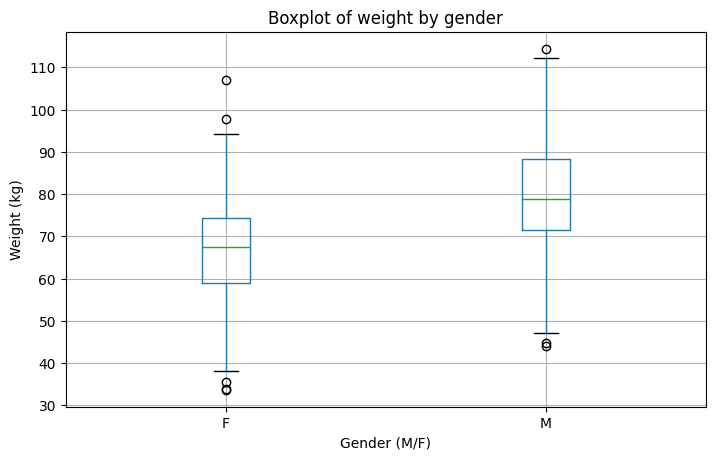

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))
df.boxplot(by='sex', column=['weight'], ax=ax)

ax.set_xlabel("Gender (M/F)")
ax.set_ylabel("Weight (kg)")
ax.set_title("Boxplot of weight by gender")
fig.suptitle("")

plt.show()

## Boxplot of weight by gender
The boxplot shows the weight of women and men.  
Most women weigh between 59 kg and 74 kg, and most men between 71 kg and 88 kg.  
The dots show people with unusually low or high weight.  

### Table of smokers and non-smokers in percentage:

In [8]:
smoking_percent = df['smoker'].value_counts(normalize=True)*100 
print("Table of smokers and non-smokers in percentage:")
for yes_no, value in smoking_percent.items():
        display(f"{yes_no}: {value:.0f} %")
        

Table of smokers and non-smokers in percentage:


'No: 73 %'

'Yes: 27 %'

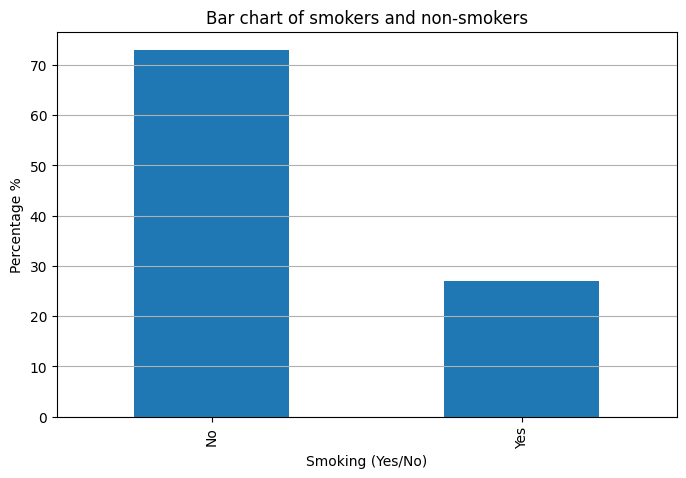

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))
smoking_percent = df['smoker'].value_counts(normalize=True).round(2)*100 
   
smoking_percent.plot.bar(ax=ax)

ax.set_xlabel("Smoking (Yes/No)")
ax.set_ylabel("Percentage %")
ax.set_title("Bar chart of smokers and non-smokers")

plt.grid(axis = 'y')
plt.show()

## Bar chart of smokers and non-smokers
The bar chart shows the percentage of smokers and non-smokers.   
27 % of the participants smoke, while 73 % do not smoke.

### Table of people with and without disease in percentage:

In [10]:
disease_percent = df['disease'].value_counts(normalize = True)*100
print("Table of people with and without disease in percentage:")
for value, prc in disease_percent.items():
    print("---------")
    print(f"{value}: {prc:.2f} %")
   

Table of people with and without disease in percentage:
---------
0: 94.12 %
---------
1: 5.88 %


"Table of people with and without disease in percentage" shows that approximately 5.88 % of the people have the disease.

In [11]:
np.random.seed(42)
real_disease_mean = df['disease'].mean()*100

simulate_disease = np.random.binomial(n = 1, p = df['disease'].mean(), size = 1000)
# print(simulate_disease)
simulated_disease_mean = simulate_disease.mean()*100

diff = simulated_disease_mean - real_disease_mean

print(f"Simulated disease mean: {real_disease_mean:.2f} %\n")
print(f"Difference between simulated proportion with the actual proportion: {diff:.2f} %")

Simulated disease mean: 5.88 %

Difference between simulated proportion with the actual proportion: -0.27 %


The real dataset shows that approximately 5.88 % of people have the disease.  
Simulations for 1000 people showed a result of approximately 5.60 %.  
The difference is -0.28 %, which shows, that simulated value is very close to the real proportion.  

In [12]:
bp = df['systolic_bp']
bp_mean = bp.mean()
bp_standard_deviation = bp.std(ddof=1)
bp_length = len(bp)
z = 1.96 # 95%
half_width = z*bp_standard_deviation / np.sqrt(bp_length)

low = bp_mean - half_width
high = bp_mean + half_width

print(f"The mean blood pressure is: {bp_mean:.2f} mmHg.")
print(f"The 95% confidence interval is: {low:.2f}, {high:.2f}.")

The mean blood pressure is: 149.18 mmHg.
The 95% confidence interval is: 148.29, 150.07.


In [13]:
smokers = df[df['smoker'] == "Yes"] 
non_smokers = df[df['smoker'] == "No"]

smokers_mean = smokers['systolic_bp'].mean()
non_smokers_mean = non_smokers['systolic_bp'].mean()

print(f"The average blood pressure for smokers is {smokers_mean:.2f} mmHg, "
      f"and for non-smokers {non_smokers_mean:.2f} mmHg.\n")

print("------- One-sided t-test ------")

t_stat, p_val = ttest_ind(smokers['systolic_bp'], non_smokers['systolic_bp'], equal_var=False, alternative="greater")
print(f"t test statistic: {t_stat:.3f}")
print(f"p-value: {p_val:.3f}")

The average blood pressure for smokers is 149.52 mmHg, and for non-smokers 149.05 mmHg.

------- One-sided t-test ------
t test statistic: 0.450
p-value: 0.326


### Hypothesis

H<sub>0</sub>: smokers = non-smokers.  

H<sub>1</sub>: smokers > non-smokers.

### Question
Is the mean blood pressure higher for smokers than for non-smokers?  

#### Answear
The p-value (0.326) is larger than 0.05.  
We cannot reject the null hypothesis H<sub>0</sub>, so we do not have evidence that smokers have higher blood pressure than non-smokers.